# InfoPillar Solution Pvt Ltd | Machine Learning Intern | NOV2021

# AUTHOR = AMAR RAMESH BHADE

# TASK 3 = Housing Prices Prediction Project 

### IMPORTING REQUIRED LIBRARY

In [86]:
import pandas as pd

In [87]:
import numpy as np

In [88]:
from matplotlib import pyplot as plt

In [89]:
import seaborn as sns

In [90]:
#for warnings
import warnings as wr
wr.filterwarnings("ignore")

In [91]:
# loading dataset
data=pd.read_csv("boston.csv")

In [92]:
boston_data=data.drop(["Unnamed: 0"],axis=1)

In [93]:
boston_data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [94]:
boston_data.tail(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [95]:
boston_data.shape

(506, 14)

In [96]:
# checking null values
boston_data.isnull().sum()


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [97]:
# for statistical description

boston_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [98]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [99]:
boston_data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [100]:
# correlation
boston_data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

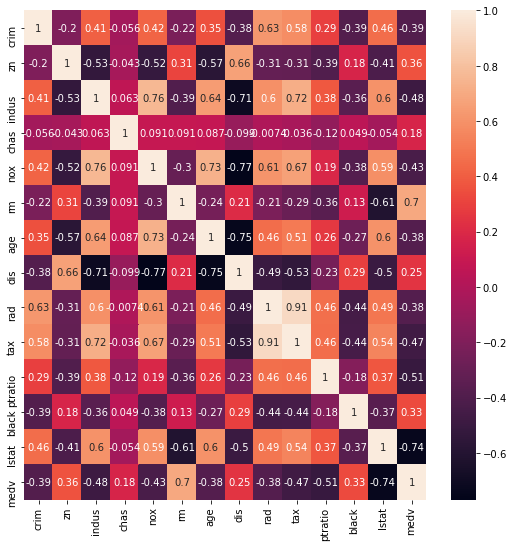

In [101]:
# now we plot heatmap using correlation
plt.figure(figsize=(9,9))
sns.heatmap(boston_data.corr(),annot=True)


### now split data into train_test_split

In [102]:
# now we taken dependent and independent variables x and y
x=boston_data.drop(["medv"],axis=1)

In [103]:
y=boston_data["medv"]

In [104]:
# now we apply train test split
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

In [106]:
x_train.shape,x_test.shape

((354, 13), (152, 13))

In [107]:
# now we apply machine learning algorithm random forest
from sklearn.ensemble import RandomForestRegressor

In [108]:
rfr=RandomForestRegressor(n_estimators=10)

In [109]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [110]:
rfr.score(x_test,y_test)

0.8618618833942351

In [111]:
# now we predict the test data
prediction=rfr.predict(x_test)

In [112]:
prediction

array([23.59, 29.63, 16.41, 24.14, 16.1 , 20.67, 21.37, 14.97, 21.87,
       20.33, 19.03, 19.75,  9.28, 21.18, 18.18, 25.89, 19.49,  8.07,
       44.97, 15.79, 24.18, 23.92, 14.23, 23.37, 14.38, 15.87, 21.14,
       14.58, 19.97, 20.86, 19.04, 23.18, 29.24, 20.97, 14.41, 15.53,
       34.32, 19.18, 21.11, 24.  , 18.34, 31.89, 45.64, 19.13, 22.58,
       12.54, 14.7 , 24.86, 18.55, 27.76, 21.67, 36.14, 16.23, 26.91,
       46.82, 22.59, 16.47, 32.99, 21.91, 21.3 , 24.27, 34.57, 27.6 ,
       20.48, 26.09, 16.37, 13.18, 23.65, 28.49, 16.72, 20.88, 30.07,
       10.2 , 21.46, 22.13,  8.01, 19.76, 45.62, 10.17, 13.94, 21.2 ,
       11.24, 19.28, 10.34, 21.  , 25.26, 15.98, 23.42, 23.45, 17.83,
       21.74,  7.96, 19.97, 20.09, 23.19, 19.69, 39.88, 10.61, 13.49,
       10.79, 20.71, 23.57, 13.31, 21.17, 19.94, 11.64, 19.33, 24.2 ,
       21.04, 21.85,  9.32, 16.34, 22.72, 23.94, 30.98, 15.33, 42.14,
       17.78, 19.38, 23.8 , 19.18, 24.07,  8.66, 21.14, 24.61, 22.52,
       23.64, 33.76,

In [113]:
# now we check the accuracy of the model
accuracy=rfr.score(x_test,y_test)
print("accuracy :",accuracy*100)


accuracy : 86.18618833942351


In [114]:
# now we find the mean squared error and root mean squred error
# import required library
from sklearn.metrics import mean_squared_error

In [115]:
mse=mean_squared_error(y_test,prediction)

In [116]:
print("mean squared error is :",mse)

mean squared error is : 10.293098684210525


In [117]:
# for root mean squared error
rmse=np.sqrt(mse)
print("root mean squared error is :",rmse)

root mean squared error is : 3.2082859417780276
